# Technology focus: Curio Seeker
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for Curio Seeker data.

## Loading the data
Instructions on how to obtain Curio data [can be found here](https://github.com/giovp/spatialdata-sandbox/blob/main/curio_io/). Then, please use the `to_zarr.py` file to convert the raw data to Zarr.

In [1]:
# please use symlinks or copy the data to make this path available
curio_zarr_path = "./curio.zarr"

In [2]:
import spatialdata as sd

curio_sdata = sd.read_zarr(curio_zarr_path)
curio_sdata

/Users/tim.treis/anaconda3/envs/spatialdata/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/tim.treis/anaconda3/envs/spatialdata/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


SpatialData object with:
├── Shapes
│     └── 'cells': GeoDataFrame shape: (69713, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 69713 × 24270
    obs: 'cluster', 'region', 'instance_id'
    uns: 'Top_cluster_defining_features', 'bead_matching_quality', 'gene_alignment_quality', 'overall_sample_quality', 'read_quality', 'spatialdata_attrs'
    obsm: 'spatial': AnnData (69713, 24270)
with coordinate systems:
▸ 'global', with elements:
        cells (Shapes)

## Visualise the data
We are going to visualize gene expression and cluster assignments on top of the circular capture locations (beads). For this, we need to load the `spatialdata_plot` library which extends the `sd.SpatialData` object with the `.pl` module. 

In [8]:
import spatialdata_plot

curio_sdata.table.to_df().sum(axis=0).sort_values(ascending=False).head(10)
# We will select some of the highly expressed genes for this example

Alb          4043600.0
Apoe          735586.0
Apoa1         622839.0
Mup3          596806.0
Apoa2         533879.0
mt-Rnr2       505561.0
Ttr           463069.0
Serpina3k     440727.0
Trf           385121.0
Fabp1         337025.0
dtype: float32

Furthermore, we will transform the values with `np.log1p` for better readability.

### Gene expression

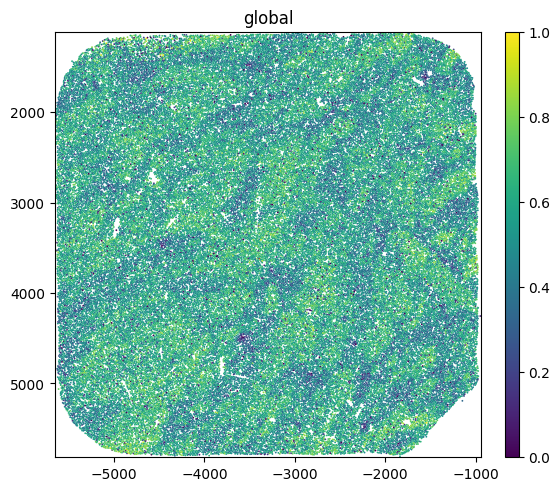

In [4]:
import numpy as np

curio_sdata.pl.render_shapes(color="Alb", transfunc=np.log1p).pl.show()

### Cluster assignment

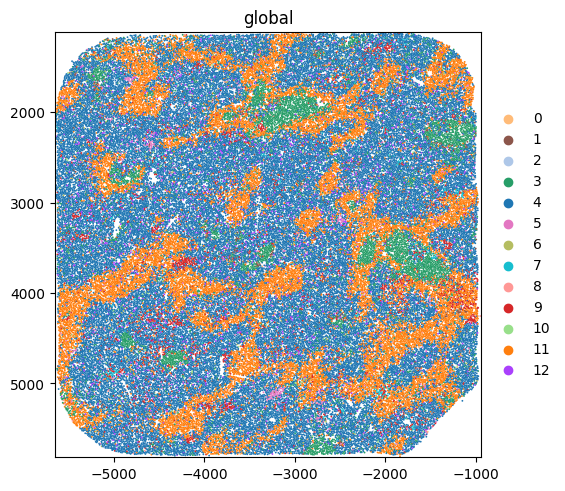

In [5]:
curio_sdata.pl.render_shapes(color="cluster").pl.show()

We can also provide `ax` objects to `spatialdata_plot` for further customisation.

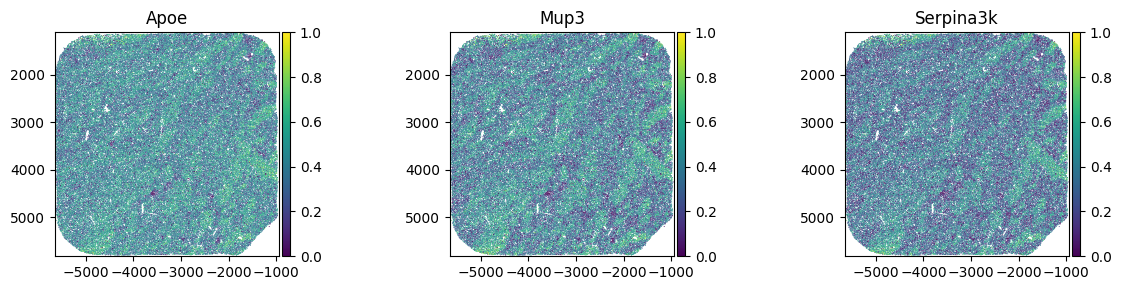

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))

curio_sdata.pl.render_shapes(color="Apoe", transfunc=np.log1p).pl.show(ax=axs[0], title="Apoe")

curio_sdata.pl.render_shapes(color="Mup3", transfunc=np.log1p).pl.show(ax=axs[1], title="Mup3")

curio_sdata.pl.render_shapes(color="Serpina3k", transfunc=np.log1p).pl.show(ax=axs[2], title="Serpina3k")

plt.tight_layout()